# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Mhamed Maatou

#### Github repository: https://github.com/Mhamedben/M7Final-MM.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

My topic of interest is automated vehicles and their safety features. I would like to analyze a webpage from the National Highway Traffic Safety Administration (NHTSA) at https://www.nhtsa.gov/vehicle-safety/automated-vehicles-safety. The HTML file of the page has been saved in my project folder.

In [2]:
import requests
import pickle

# URL of the article
url = "https://www.nhtsa.gov/vehicle-safety/automated-vehicles-safety"

# request to get the HTML content
response = requests.get(url)
html_content = response.text

# determine pkl file name
file_name = "article.pkl"

# Save HTML content to a pickle file
with open(file_name, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content saved to {file_name}")

HTML content saved to article.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [13]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

# Step 1: Read the HTML file
with open("NHTSA-Automated-Car.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Step 2: Parse HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Step 3: Perform sentiment analysis
blob = TextBlob(text)
polarity_score = blob.sentiment.polarity

# Step 4: Count number of sentences in the original article
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)  # Basic sentence split
num_sentences = len(sentences)

# Step 5: Print results
print(f"Polarity score: {polarity_score:.2f}")
print(f"Number of sentences: {num_sentences}")

Polarity score: 0.18
Number of sentences: 101


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [59]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Load the spaCy model (en_core_web_sm is a small English model)
nlp = spacy.load("en_core_web_sm")

# Step 2: Read the HTML file
with open("NHTSA-Automated-Car.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Step 4: Process the text using spaCy pipeline
doc = nlp(text)

# Step 5: Extract tokens and convert to lowercase, then filter out stopwords, non-alphabetical tokens, and punctuation
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Step 6: Count token frequencies
token_counts = Counter(tokens)

# Step 7: Print the most common tokens and their frequencies
common_tokens = token_counts.most_common(5)

print("5 Most Frequent Tokens")
for token, freq in common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")

5 Most Frequent Tokens
Token: 'vehicle', Frequency: 55
Token: 'safety', Frequency: 52
Token: 'driving', Frequency: 50
Token: 'automated', Frequency: 47
Token: 'vehicles', Frequency: 40


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [60]:
import spacy
from bs4 import BeautifulSoup
from collections import Counter

# Step 1: Load the spaCy model (en_core_web_sm is a small English model)
nlp = spacy.load("en_core_web_sm")

# Step 2: Read the HTML file
with open("NHTSA-Automated-Car.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Step 3: Parse HTML and extract text
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Step 4: Process the text using spaCy pipeline
doc = nlp(text)

# Step 5: Extract lemmas and convert to lowercase

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.lemma_.strip()
]

# Step 6: Count lemma frequencies
lemma_counts = Counter(lemmas)

# Step 7: Print the most common lemmas and their frequencies
common_lemmas = lemma_counts.most_common(5)

print("5 Most Frequent Lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

5 Most Frequent Lemmas:
Lemma: 'vehicle', Frequency: 79
Lemma: 'safety', Frequency: 52
Lemma: 'system', Frequency: 41
Lemma: 'driver', Frequency: 39
Lemma: 'drive', Frequency: 35


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

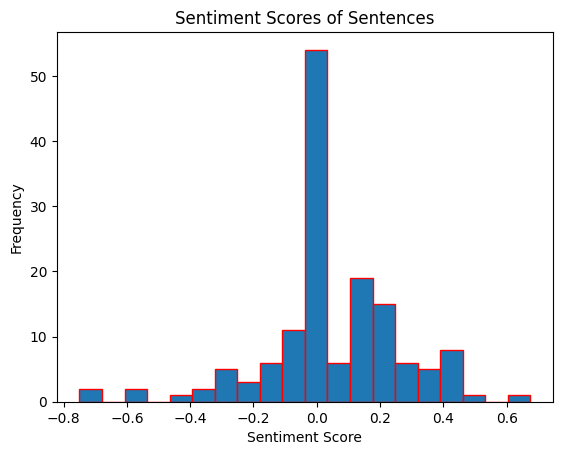

In [64]:
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the saved text file
with open("NHTSA-Automated-Car.html", 'r', encoding='utf-8') as file:
    text_content = file.read()

# Process the text with spaCy to split into sentences
doc = nlp(text_content)
sentences = list(doc.sents)

# Calculate sentiment scores for each sentence using TextBlob
sentence_scores = [TextBlob(sentence.text).sentiment.polarity for sentence in sentences]

# Plot the histogram of scores
plt.hist(sentence_scores, bins=20, edgecolor='red')
plt.title("Sentiment Scores of Sentences")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

## From the histogram, the most common range of sentiment scores is around 0 (neutral), 
## meaning that the article generally maintains a neutral sentiment.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

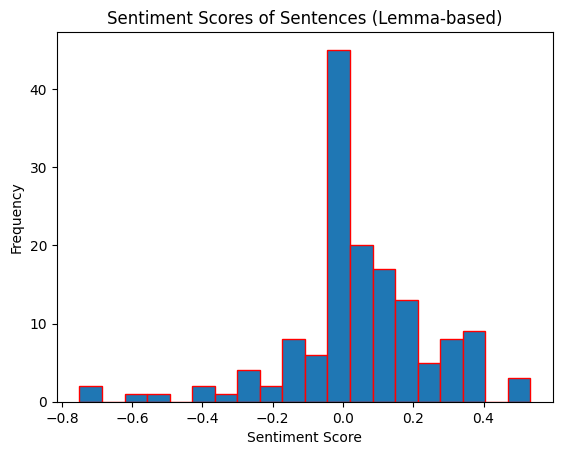

In [71]:
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the saved text file
with open("NHTSA-Automated-Car.html", 'r', encoding='utf-8') as file:
    text_content = file.read()

# Process the text with spaCy to split into sentences
doc = nlp(text_content)
sentences = list(doc.sents)

# Calculate sentiment scores for each sentence based on lemmatized words
sentence_scores_lemmas = []
for sentence in sentences:
    # Lemmatize the tokens in the sentence
    lemmatized_tokens = [token.lemma_ for token in sentence if not token.is_stop and not token.is_punct]
    lemmatized_text = " ".join(lemmatized_tokens)
    
    # Calculate sentiment score using TextBlob
    score = TextBlob(lemmatized_text).sentiment.polarity
    sentence_scores_lemmas.append(score)

# Plot the histogram of sentiment scores based on lemmatized tokens
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='red')
plt.title("Sentiment Scores of Sentences (Lemma-based)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


# Based on the histogram, the most common range of lemma-based sentiment scores is approximately 0, 
# indicating that the majority of sentences in the text are either neutral or have a sentiment close to neutral.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [102]:
import numpy as np

# `sentence_scores` contains the scores based on tokens (from Question 5)
# `sentence_scores_lemmas` contains the scores based on lemmas (from Question 6)

# Calculate the cutoff scores
cutoff_tokens = np.median(sentence_scores)
cutoff_lemmas = np.median(sentence_scores_lemmas)

# Print the cutoff scores
print("Cutoff Score (tokens):", cutoff_tokens)
print("Cutoff Score (lemmas):", cutoff_lemmas)


Cutoff Score (tokens): 0.0
Cutoff Score (lemmas): 0.025


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [ ]:
# Initialize empty list for summary sentences 
summary_sentences = []

# Calculate scores and add sentences that exceed cutoff
for sent in doc.sents:
    # Count tokens (excluding punctuation and spaces)
    score = len([token for token in sent if not token.is_punct and not token.is_space])
   
    # If score exceeds cutoff, add sentence to summary
    if score > 25:
        summary_sentences.append(sent.text.strip())

# Join sentences with newlines and print summary
summary = '\n'.join(summary_sentences)
print(summary)
print("\nNumber of Sentences in Summary:", len(summary_sentences))

Automated Vehicle Safety | NHTSA Skip to main content National Highway Traffic Safety Administration, part of the U.S. Department of Transportation Report a Safety Problem Toggle navigation Menu Homepage Report a Safety Problem Ratings Recalls
Risky Driving Drunk Driving Drug-Impaired Driving Distracted Driving Speeding Drowsy Driving Road Safety Child Safety Teen Driving Older Drivers Pedestrian Safety Bicycle Safety Motorcycle Safety School Bus Safety Vehicle Safety Car Seats & Boosters Seat Belts
Tires Air Bags Takata Recall Spotlight Driver Assistance Technologies Electric & Hybrid Vehicles Automated Vehicles Vehicle Theft Prevention Odometer Fraud Adapted Vehicles 15-Passenger Vans More Briefing Room
Importing a Vehicle Data Research Laws & Regulations Vehicle Manufacturers State Governments Enforcement & Justice Vehicle Safety Topics Vehicle Safety 15-Passenger Vans Adapted Vehicles Air Bags Automated Vehicles for Safety Car Seats and Booster Seats Seat Belts Driver Assistance Te

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [ ]:
# Get the summary text from the last cell
summary_text = '\n'.join(summary_sentences)

# Create TextBlob object for sentiment analysis
summary_blob = TextBlob(summary_text)

# Get polarity score and sentence count
polarity = summary_blob.sentiment.polarity
sentence_count = len(summary_sentences)

# Print results with labels
print(f"Token Summary Sentiment Polarity Score: {polarity:.2f}")
print(f"Number of sentences in the Token summary: {sentence_count}")

Token Summary Sentiment Polarity Score: 0.16
Number of sentences in the Token summary: 38


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [159]:
# Ensure article_sentences and lemma_scores are aligned
article_sentences = re.split(r'(?:\n{2,}|\n\s*|\s{2,}|(?<=[.!?]) +)', article_text)
article_sentences = [sentence.strip() for sentence in article_sentences if sentence.strip()]

lemma_scores = []
for sent in article_sentences:
    doc = nlp(sent)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc if not token.is_punct])
    blob = TextBlob(lemmatized_sentence)
    lemma_scores.append(blob.sentiment.polarity)

# Create the lemma-based summary
lemma_summary_sentences = []
for i, sent in enumerate(article_sentences):
    if lemma_scores[i] > 0.0:  # Using the lemma cutoff score identified earlier
        lemma_summary_sentences.append(sent.strip())

# Generate the summary text
lemma_summary_text = ' '.join(lemma_summary_sentences)

# Step 4: Print the summary and sentence count
print("Summary of the Article (Lemma-Based):")
print(lemma_summary_text)


Summary of the Article (Lemma-Based):
Automated Vehicle Safety | NHTSA Skip to main content National Highway Traffic Safety Administration, part of the U.S. Department of Transportation Report a Safety Problem Toggle navigation Menu Homepage Report a Safety Problem Ratings Recalls Risky Driving Drunk Driving Drug-Impaired Driving Distracted Driving Speeding Drowsy Driving Road Safety Child Safety Teen Driving Older Drivers Pedestrian Safety Bicycle Safety Motorcycle Safety School Bus Safety Vehicle Safety Car Seats & Boosters Seat Belts Tires Air Bags Takata Recall Spotlight Driver Assistance Technologies Electric & Hybrid Vehicles Automated Vehicles Vehicle Theft Prevention Odometer Fraud Adapted Vehicles 15-Passenger Vans More Briefing Room Importing a Vehicle Data Research Laws & Regulations Vehicle Manufacturers State Governments Enforcement & Justice Vehicle Safety Topics Vehicle Safety 15-Passenger Vans Adapted Vehicles Air Bags Automated Vehicles for Safety Car Seats and Booster

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [160]:
from textblob import TextBlob
# Calculate the polarity score of the summary
summary_analysis = TextBlob(summary)
summary_polarity = summary_analysis.sentiment.polarity

# Print the polarity score of the summary
print(f"Summary Polarity Score: {summary_polarity}")

# Process the summary text to count the sentences
summary_doc = nlp(summary)
num_summary_sentences = len(list(summary_doc.sents))

# Print the number of sentences in the summary
print(f"Number of sentences in the summary: {num_summary_sentences}")

Summary Polarity Score: 0.21875
Number of sentences in the summary: 4


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores for the initial article (0.18), token-based summary (0.16), and lemma-based summary (0.21875) show slight variations in sentiment. The token-based summary is slightly more neutral, likely due to the removal of some positive elements, while the lemma-based summary retains a slightly higher positive sentiment by focusing on core words. Overall, the sentiment remains relatively consistent across all versions

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think the lemma-based summary is the better option, as it more accurately preserves both the meaning and sentiment of the original article.